In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [56]:
data = pd.read_csv('train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [57]:
data_dev = data[:1000].T
Y_dev = data_dev[0].astype(int)  # Ensure labels are integers
X_dev = data_dev[1:]
X_dev = X_dev / 255.

data_train = data[1000:].T
Y_train = data_train[0].astype(int)  # Ensure labels are integers
X_train = data_train[1:]
X_train = X_train / 255.
_, m_train = X_train.shape

In [58]:
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1. / 784)  # Variance scaling for W1
    b1 = np.zeros((10, 1))  # Biases initialized to zero
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1. / 10)  # Variance scaling for W2
    b2 = np.zeros((10, 1))  # Biases initialized to zero
    return W1, b1, W2, b2


# Activation and loss functions
def ReLU(Z):
    return np.maximum(Z, 0)


def softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    exp_Z = np.exp(Z)
    A = exp_Z / np.sum(exp_Z, axis=0)
    return A


def ReLU_deriv(Z):
    return Z > 0


def one_hot(Y, num_classes=10):
    one_hot_Y = np.zeros((num_classes, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y


# Forward and backward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y, m):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [59]:
# Collecting accuracy values during training
accuracies = []

# Mini-batch gradient descent
def mini_batch_gradient_descent(X, Y, alpha, iterations, batch_size):
    W1, b1, W2, b2 = init_params()
    m = X.shape[1]  

    for i in range(iterations):
        permutation = np.random.permutation(m)
        X_shuffled = X[:, permutation]
        Y_shuffled = Y[permutation]
        
        for start in range(0, m, batch_size):
            end = min(start + batch_size, m)
            X_batch = X_shuffled[:, start:end]
            Y_batch = Y_shuffled[start:end]
            
            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_batch)
            dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_batch, Y_batch, X_batch.shape[1])
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y_batch)
            accuracies.append(accuracy)
            print(f"Iteration: {i}, Accuracy: {accuracy:.4f}")

    return W1, b1, W2, b2


In [60]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)


def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)

In [61]:
# Train the model with mini-batch gradient descent
W1, b1, W2, b2 = mini_batch_gradient_descent(X_train, Y_train, 0.10, 500, 128)


Iteration: 0, Accuracy: 0.8250
Iteration: 10, Accuracy: 0.9500
Iteration: 20, Accuracy: 1.0000
Iteration: 30, Accuracy: 0.9500
Iteration: 40, Accuracy: 0.9500
Iteration: 50, Accuracy: 0.9750
Iteration: 60, Accuracy: 0.9750
Iteration: 70, Accuracy: 1.0000
Iteration: 80, Accuracy: 0.9500
Iteration: 90, Accuracy: 0.9250
Iteration: 100, Accuracy: 0.9500
Iteration: 110, Accuracy: 0.9250
Iteration: 120, Accuracy: 1.0000
Iteration: 130, Accuracy: 1.0000
Iteration: 140, Accuracy: 0.9750
Iteration: 150, Accuracy: 0.9250
Iteration: 160, Accuracy: 0.9750
Iteration: 170, Accuracy: 0.9750
Iteration: 180, Accuracy: 0.9500
Iteration: 190, Accuracy: 0.9500
Iteration: 200, Accuracy: 0.9500
Iteration: 210, Accuracy: 0.9750
Iteration: 220, Accuracy: 0.9250
Iteration: 230, Accuracy: 0.9500
Iteration: 240, Accuracy: 0.9750
Iteration: 250, Accuracy: 0.9500
Iteration: 260, Accuracy: 0.9750
Iteration: 270, Accuracy: 1.0000
Iteration: 280, Accuracy: 0.9250
Iteration: 290, Accuracy: 0.9000
Iteration: 300, Accur

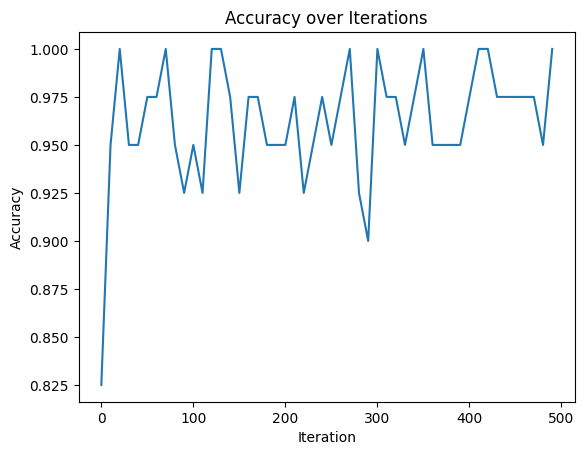

In [62]:
plt.plot(range(0, len(accuracies) * 10, 10), accuracies)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy over Iterations')
plt.show()


In [63]:
# Test prediction function
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


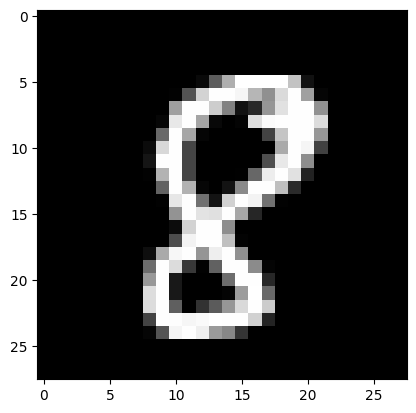

Prediction:  [0]
Label:  0


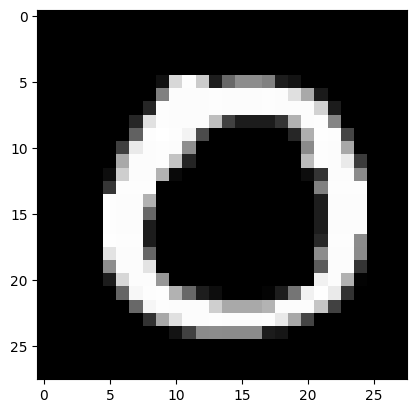

Prediction:  [4]
Label:  4


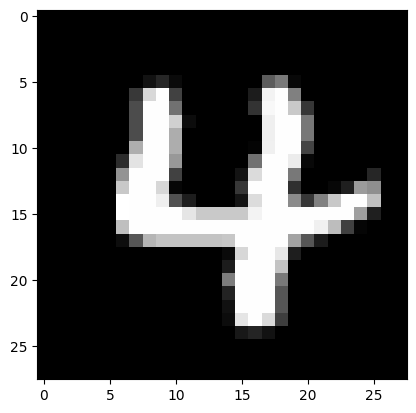

Prediction:  [7]
Label:  7


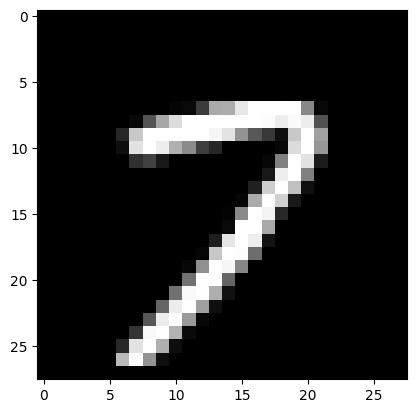

Prediction:  [1]
Label:  1


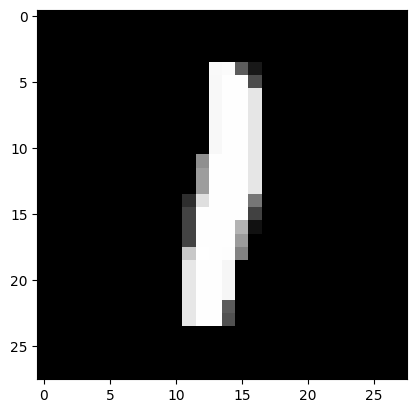

Prediction:  [1]
Label:  1


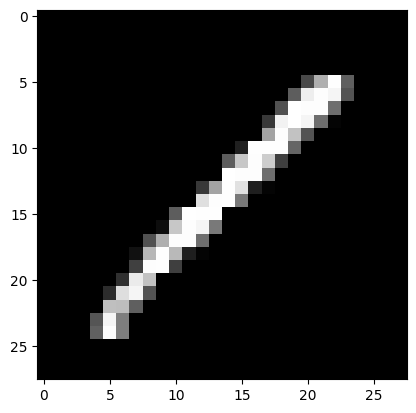

Prediction:  [5]
Label:  5


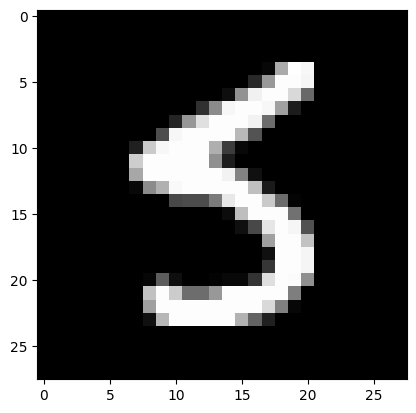

Prediction:  [5]
Label:  9


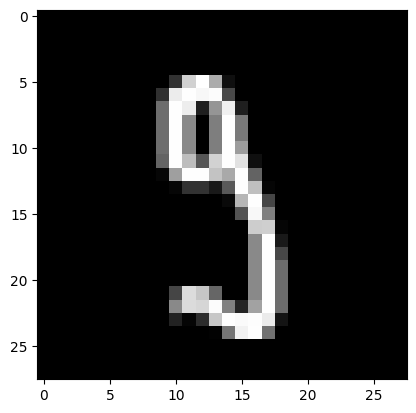

In [66]:
# Test the model with some predictions
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)


In [65]:
# Evaluate on development set
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print("Dev set accuracy: ", get_accuracy(dev_predictions, Y_dev))

Dev set accuracy:  0.925
